# Date: Wednesday, January 18, 2017
# Author: Kwame Bridgewater
## This notebook contain the analysis done on the Titanic Passengers Dataset. My analysis explores the following questions: 
## How did a passenger's gender affect their chances of survival?
## How did a passenger's Socio-economic status affect their chances of survival?
## How did a passenger's age affect their chances of survival?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\owner\Anaconda2\envs\dato-env\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
titanic_df=pd.read_csv("titanic_train.csv")

## For the purpose of my analysis I only retained the variables relevant to the questions I am exploring


In [3]:
# drop unused variables from dataset
titanic_df=titanic_df.drop(['Ticket','Cabin','Embarked','SibSp','Parch','Fare','PassengerId'],axis=1) 

In [4]:
titanic_df.head() 

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0


# Question 1: How did a passenger's gender affect survival?

## First I will first look at the overall survival rate as a reference point for further analyses

## the 'Survived' variable is coded as 1 for survived and 0 for died we can take mean of this column to calculate the survival %'s

In [5]:
titanic_df['Survived'].mean()

0.3838383838383838

## Now I will look at the overall survival rate distributed by Gender

In [6]:
gender_group=titanic_df.groupby(titanic_df['Sex']) #Use groupby object to perform aggregate calculations

In [7]:
gender_group['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## The survival rates by gender (74%  for females and 19% males are significantly different than the overall survival rate (39%) . The discrepancies in survival rates would indicate that gender played a signifcant role in survival


# Question 2: How did a passenger's Economic class affect survival?

## As per Kaggle The Pclass variable served as a proxy for a passenger's Economic class with the following levels: 
## 1 - Upper Class
## 2 -Middle Class
## 3 - Lower Class

In [8]:
class_group=titanic_df.groupby(titanic_df['Pclass']) #Use groupby object to perform aggregate calculations

In [9]:
class_group['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## The survival rates distributed by Economic Class indicate that Economic Class played a significant role in survival; The survival rates for the upper and middle classes are higher than the overall survival rate while the lower class is significantly lower

## The following plot shows the Survival trend for gender further distributed by Economic class. As you can see higher economic class led to higher survival rates for both genders 

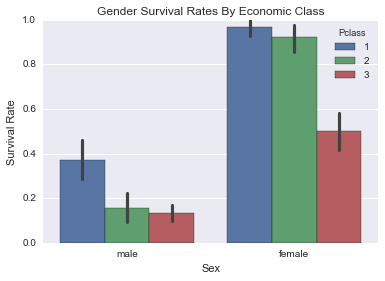

In [10]:
sns.barplot(x='Sex',y='Survived',data=titanic_df,hue='Pclass')
plt.title('Gender Survival Rates By Economic Class')
plt.ylabel('Survival Rate')

# Question 3: How did a passenger's age affect survival? 

## Before examining the age factor in greater detail I will look at some preliminary distribution of the age factor vs gender and economic class

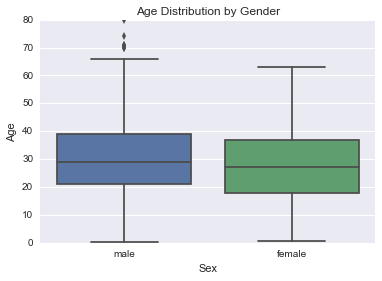

In [11]:
sns.boxplot(x='Sex',y='Age',data=titanic_df)
plt.title('Age Distribution by Gender')

## The above plot shows the female passengers had a slightly lower median average, with the Male passengers having more outliers as well


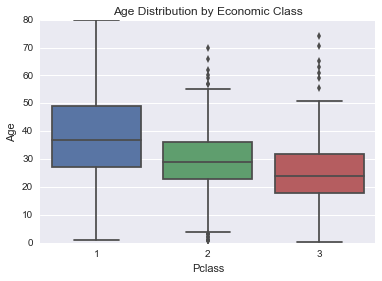

In [12]:
sns.boxplot(x='Pclass',y='Age',data=titanic_df)
plt.title('Age Distribution by Economic Class')

## The plot above shows a higher median age, and higher Interquartile range for the Upper Economic class compared to middle and lower class

## For my analysis I will transform the Age variable into a categorical variable Age_Group with 3 levels Child, Adult and Missing

In [13]:
## Group age of passenger into 3 categories Adult, Child, Missing
def age_band (Age):
    if Age < 18:
        Category='Child'
    
    elif Age >=18:
        Category='Adult'
        
    else:
        Category='Missing'
        
    return Category


In [14]:
titanic_df['Age_Group']=titanic_df['Age'].apply(age_band)

In [15]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Age_Group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,Adult


In [16]:
age_grouping=titanic_df.groupby('Age_Group') #Use groupby object to perform aggregate calculations

In [17]:
age_grouping['Survived'].count() # Get a count of each category

Age_Group
Adult      601
Child      113
Missing    177
Name: Survived, dtype: int64

## The analysis for age is somewhat trickier than the gender and economic class variables as nearly 20% of the data is missing. I will perform further analysis of the Age factor with the previously discussed factors Gender and Economic Class

## Overall survival rates by age category (including missing)

In [18]:
age_grouping['Survived'].mean()

Age_Group
Adult      0.381032
Child      0.539823
Missing    0.293785
Name: Survived, dtype: float64

## The Adult Category (18+) survival rate is close to the overall survival rate (39%). There is a significantly higher survival rate for the child category. The survival rate for the missing category is lower than the overall survival rate. The following plots examine the Age category vs Economic Class and Gender


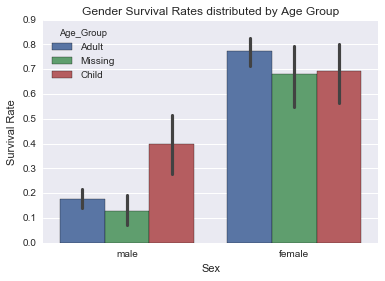

In [19]:
sns.barplot(x='Sex',y='Survived',data=titanic_df,hue='Age_Group')
plt.title('Gender Survival Rates distributed by Age Group')
plt.ylabel('Survival Rate')

## The above plot shows Gender survival rates further distributed by Age_group. For males we see a higher trend for the Child category. This trend is not observed for females, but the survival rates are signicantly higher for all Age categories for females, which is consistent with the overall survival rate for females (74% as previously noted)

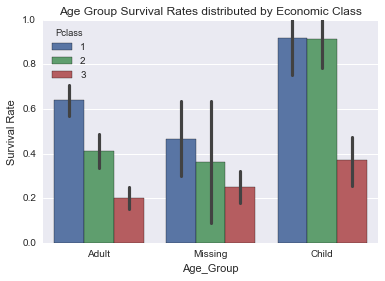

In [20]:
sns.barplot(x='Age_Group',y='Survived',data=titanic_df,hue='Pclass')
plt.title('Age Group Survival Rates distributed by Economic Class')
plt.ylabel('Survival Rate')

## The above plot shows the Age category survival rates further distributed by Economic class the results are consistent with previous analysis showing higher survival rates with higher economic class. Even when the age is unknown, Economic class is a good predictor of survival rate.

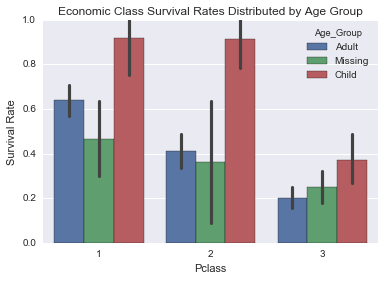

In [21]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df,hue='Age_Group')
plt.title('Economic Class Survival Rates Distributed by Age Group')
plt.ylabel('Survival Rate')

## The final plot shows the Survival rate of Economic class distributed by Age Category. Again the results are consistent with previous analysis, higher overall survival rates for the Upper and Middle economic class and higher survival rates within economic class for the Child Age Category. 

## Conclusions: I believe the data shows a link between Gender, Economic Class and Age  and  the survival of a Titanic passenger. Passengers who were either female, upper or middle class or young were more likely to have survived. Further hypothesis testing would be required to determine if the discrepancy in survival rates (i.e male vs female, upper and middle class vs lower class) are statistically significant.

## One potential confounding factor is location of the cabins; were passengers in  upper and middle class more likely to survive simply because they were located closer to the lifeboats?

## Although the titanic dataset represents a relaitvely large sample (891 of 2208 passengers) it is influenced by survivor bias due to data collection that occured after the sinking; According to the encyclopedia-titanica website 712 out of 2208 passengers survived. The survival rate of the dataset (38%) is  different than the survival rate of the population (32%). 

## There are 177 missing values for the age variable, however according to the encyclopedia-titanica website there were 128 children abord, and the dataset contains 113 passengers who were classified as children based on my under 18 criterion. I conclude that most of the passengers with missing age data are likely adults

